<a href="https://colab.research.google.com/github/Anne340/Football_Scores_Prediction/blob/main/Football_Scores_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
rank = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Rank dataset

## Checking the data


In [ ]:
# Checking the shape of the dataset
rank.shape

(27789, 16)

In [ ]:
# Getting the statistical description of the dataset
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,27789.000000,27789.0,27789.000000,27789.000000,27789.0,27788.0,27788.0,27788.0,27788.0,27788.0,27788.0,27788.0
mean,98.437151,0.0,261.332542,-0.018209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,57.023450,0.0,243.634537,4.579460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.000000,-72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,49.000000,0.0,33.000000,-2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,98.000000,0.0,192.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,147.000000,0.0,483.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,205.000000,0.0,859.000000,92.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get the unique values in the dataset
rank.nunique()

rank                       205
country_full               209
country_abrv               209
total_points                 1
previous_points            848
rank_change                 88
cur_year_avg                 1
cur_year_avg_weighted        1
last_year_avg                1
last_year_avg_weighted       1
two_year_ago_avg             1
two_year_ago_weighted        1
three_year_ago_avg           1
three_year_ago_weighted      1
confederation                6
rank_date                  143
dtype: int64

In [ ]:
# Checking dataset information
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27789 entries, 0 to 27788
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     27789 non-null  int64  
 1   country_full             27789 non-null  object 
 2   country_abrv             27789 non-null  object 
 3   total_points             27789 non-null  float64
 4   previous_points          27789 non-null  int64  
 5   rank_change              27789 non-null  int64  
 6   cur_year_avg             27789 non-null  float64
 7   cur_year_avg_weighted    27788 non-null  float64
 8   last_year_avg            27788 non-null  float64
 9   last_year_avg_weighted   27788 non-null  float64
 10  two_year_ago_avg         27788 non-null  float64
 11  two_year_ago_weighted    27788 non-null  float64
 12  three_year_ago_avg       27788 non-null  float64
 13  three_year_ago_weighted  27788 non-null  float64
 14  confederation         

## Cleaning the Dataset

In [ ]:
# Checking for null values
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      1
last_year_avg              1
last_year_avg_weighted     1
two_year_ago_avg           1
two_year_ago_weighted      1
three_year_ago_avg         1
three_year_ago_weighted    1
confederation              1
rank_date                  1
dtype: int64

In [ ]:
# Checking for duplicates
rank.duplicated().sum()

0

In [ ]:
# Renaming column names
rank.rename(columns={'country_full': 'country',"rank_date":"date"}, inplace=True)

In [ ]:
#converting date column to date time datatype
rank['date']= pd.to_datetime(rank['date'])
rank['year'] = rank.date.dt.year
rank['month'] =rank.date.dt.month

In [ ]:
rank.drop(['date', 'total_points',	'previous_points', 'rank_change', 'cur_year_avg',	'cur_year_avg_weighted',
           'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	
           'three_year_ago_avg',	'three_year_ago_weighted', 'country_abrv', 'confederation'], axis=1, inplace=True)

In [ ]:
# Drop the duplicated values
rank.drop_duplicates(inplace=True)
rank.duplicated().sum()

0

In [ ]:
rank.head()

,rank,country,year,month
0,1,Germany,1993.0,8.0
1,2,Italy,1993.0,8.0
2,3,Switzerland,1993.0,8.0
3,4,Sweden,1993.0,8.0
4,5,Argentina,1993.0,8.0


In [ ]:
# Checking for outliers
Q1 = rank.quantile(0.25)
Q3 = rank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rank     98.0
year      6.0
month     6.0
dtype: float64


In [ ]:
# Dropping the outliers to see hpw much data we lose
rank_out = rank[~((rank < (Q1 - 1.5 * IQR)) |(rank > (Q3 + 1.5 * IQR))).any(axis=1)]
rank_out.shape

(27788, 4)

I decided not to drop the ouliers since they are such a big value compared to the lareger dataset 36521 out of 57793

# Results dataset

## Check the dataset

In [ ]:
# Checking the shape of the dataset
results.shape

(28444, 9)

In [ ]:
# Getting the statistical description of the dataset
results.describe()

,home_score,away_score
count,28444.000000,28444.000000
mean,1.811876,1.225636
std,1.799756,1.426884
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Get the unique values in the dataset
results.nunique()

date          12675
home_team       262
away_team       261
home_score       25
away_score       22
tournament       89
city           1368
country         256
neutral           2
dtype: int64

In [ ]:
# Checking dataset information
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28444 entries, 0 to 28443
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        28444 non-null  object
 1   home_team   28444 non-null  object
 2   away_team   28444 non-null  object
 3   home_score  28444 non-null  int64 
 4   away_score  28444 non-null  int64 
 5   tournament  28444 non-null  object
 6   city        28443 non-null  object
 7   country     28443 non-null  object
 8   neutral     28443 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


## Cleaning the dataset

In [ ]:
# Checking the null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          1
country       1
neutral       1
dtype: int64

In [ ]:
# Checking for duplicates
results.duplicated().sum()

0

In [ ]:
# dropping unnecessary columns
results.drop(['city'], axis=1, inplace=True)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [ ]:
#converting date column to date time datatype
results['date']= pd.to_datetime(results['date'])
results['year'] = results.date.dt.year
results['month'] =results.date.dt.month

In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3


In [ ]:
results.drop(['date'], axis=1, inplace=True)

# Merging the datasets


## Getting the home rank

In [ ]:
rank.head()

,rank,country,year,month
0,1,Germany,1993.0,8.0
1,2,Italy,1993.0,8.0
2,3,Switzerland,1993.0,8.0
3,4,Sweden,1993.0,8.0
4,5,Argentina,1993.0,8.0


In [ ]:
rank.columns
rank.rename(columns={'country':'home_team'}, inplace=True)

# renaming us rename the rank column
rank.rename(columns = {'rank': 'home_rank'}, inplace =True)

In [ ]:
# Joining our dataframes on the three columns they have in common
home = pd.merge(rank, results, how='right', on=['home_team','year','month'])
home.head()

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament,country,neutral
0,NaN,Scotland,1872.0,11.0,England,0,0,Friendly,Scotland,False
1,NaN,England,1873.0,3.0,Scotland,4,2,Friendly,England,False
2,NaN,Scotland,1874.0,3.0,England,2,1,Friendly,Scotland,False
3,NaN,England,1875.0,3.0,Scotland,2,2,Friendly,England,False
4,NaN,Scotland,1876.0,3.0,England,3,0,Friendly,Scotland,False


In [ ]:
home.shape

(28444, 10)

In [ ]:
# Checking for null values
home.isnull().sum()

home_rank     19873
home_team         0
year              0
month             0
away_team         0
home_score        0
away_score        0
tournament        0
country           1
neutral           1
dtype: int64

In [ ]:
# Drop null values
home.dropna(inplace=True)
home.isnull().sum()

home_rank     0
home_team     0
year          0
month         0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

## Merging to get the away rank

In [ ]:
rank.head()

,home_rank,home_team,year,month
0,1,Germany,1993.0,8.0
1,2,Italy,1993.0,8.0
2,3,Switzerland,1993.0,8.0
3,4,Sweden,1993.0,8.0
4,5,Argentina,1993.0,8.0


In [ ]:
rank.columns
rank.rename(columns={'home_team':'away_team'}, inplace=True)


In [ ]:
# Let us now join our dataframes on the three columns they have in common
away = pd.merge(rank, results, how='right', on=['away_team','year','month'])
away.head()

,home_rank,away_team,year,month,home_team,home_score,away_score,tournament,country,neutral
0,NaN,England,1872.0,11.0,Scotland,0,0,Friendly,Scotland,False
1,NaN,Scotland,1873.0,3.0,England,4,2,Friendly,England,False
2,NaN,England,1874.0,3.0,Scotland,2,1,Friendly,Scotland,False
3,NaN,Scotland,1875.0,3.0,England,2,2,Friendly,England,False
4,NaN,England,1876.0,3.0,Scotland,3,0,Friendly,Scotland,False


In [ ]:
# Checking for null values
away.isnull().sum()

home_rank     19935
away_team         0
year              0
month             0
home_team         0
home_score        0
away_score        0
tournament        0
country           1
neutral           1
dtype: int64

In [ ]:
# Drop null values
away.dropna(inplace=True)
away.isnull().sum()

home_rank     0
away_team     0
year          0
month         0
home_team     0
home_score    0
away_score    0
tournament    0
country       0
neutral       0
dtype: int64

In [ ]:
# Merging the two datasets to get a final one
final = pd.merge(home, away, how = 'inner', left_on = ['year', 'month','away_team'],
              right_on = ['year', 'month','away_team'])
final.head()

,home_rank_x,home_team_x,year,month,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,home_rank_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y
0,19.0,Colombia,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,Colombia,0,0,FIFA World Cup qualification,Colombia,False
1,19.0,Colombia,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,67.0,Argentina,0,0,FIFA World Cup qualification,Argentina,False
2,5.0,Argentina,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,Colombia,0,0,FIFA World Cup qualification,Colombia,False
3,5.0,Argentina,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,67.0,Argentina,0,0,FIFA World Cup qualification,Argentina,False
4,70.0,Peru,1993.0,8.0,Argentina,0,1,FIFA World Cup qualification,Peru,False,5.0,Peru,0,1,FIFA World Cup qualification,Peru,False


In [ ]:
# Checking for null values
final.isnull().sum()

home_rank_x     0
home_team_x     0
year            0
month           0
away_team       0
home_score_x    0
away_score_x    0
tournament_x    0
country_x       0
neutral_x       0
home_rank_y     0
home_team_y     0
home_score_y    0
away_score_y    0
tournament_y    0
country_y       0
neutral_y       0
dtype: int64

In [ ]:
final.shape

(13707, 17)

In [ ]:
# Dropping some of the columns
final.drop(columns=['country_x', 'country_y', 'country_x',	'neutral_x',	'home_rank_y',	
                    'home_team_y',	'home_score_y',	'away_score_y',	'tournament_y', 'neutral_y'], inplace=True)

In [ ]:
# Renaming the columns
final.rename(columns={'home_rank_x' : 'home_rank',	
                      'home_team_x': 'home_team',
                      'home_score_x': 'home_score',
                      'away_score_x': 'away_score',
                      'tournament_x': 'tournament'},
                      inplace = True    
                  )

In [ ]:
final.head()

,home_rank,home_team,year,month,away_team,home_score,away_score,tournament
0,19.0,Colombia,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification
1,19.0,Colombia,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification
2,5.0,Argentina,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification
3,5.0,Argentina,1993.0,8.0,Paraguay,0,0,FIFA World Cup qualification
4,70.0,Peru,1993.0,8.0,Argentina,0,1,FIFA World Cup qualification


# Exploratory Data Analysis

## Univariate analysis

Text(0.5, 1.0, 'Tournaments Distribution')

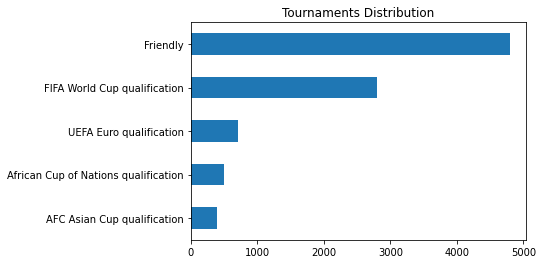

In [ ]:
# Graph showing tournaments
final.tournament.value_counts().head().sort_values().plot.barh()
plt.title('Tournaments Distribution')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45400149d0>,
      dtype=object)

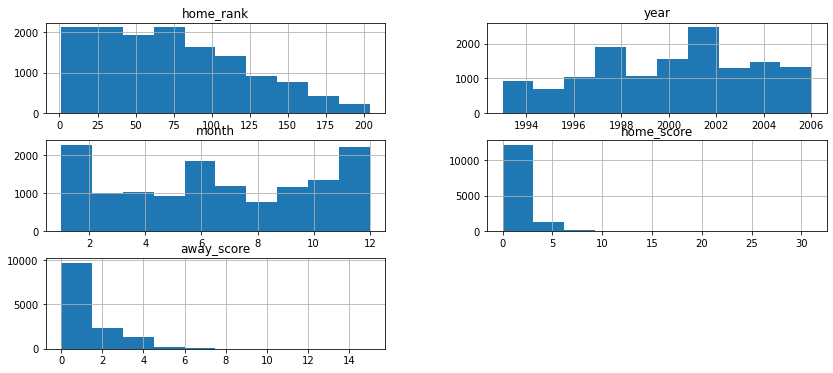

In [ ]:
# Checking the distribution of our data
final.hist(bins=10, figsize=[14,6])

## Bivariate Analysis

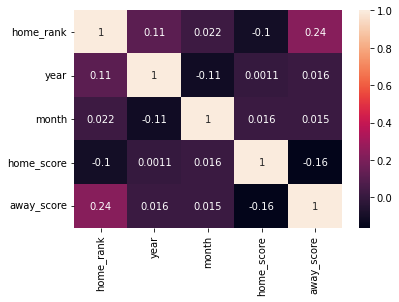

In [ ]:
# Checking for correlation
sns.heatmap(final.corr(method='pearson'), annot=True)


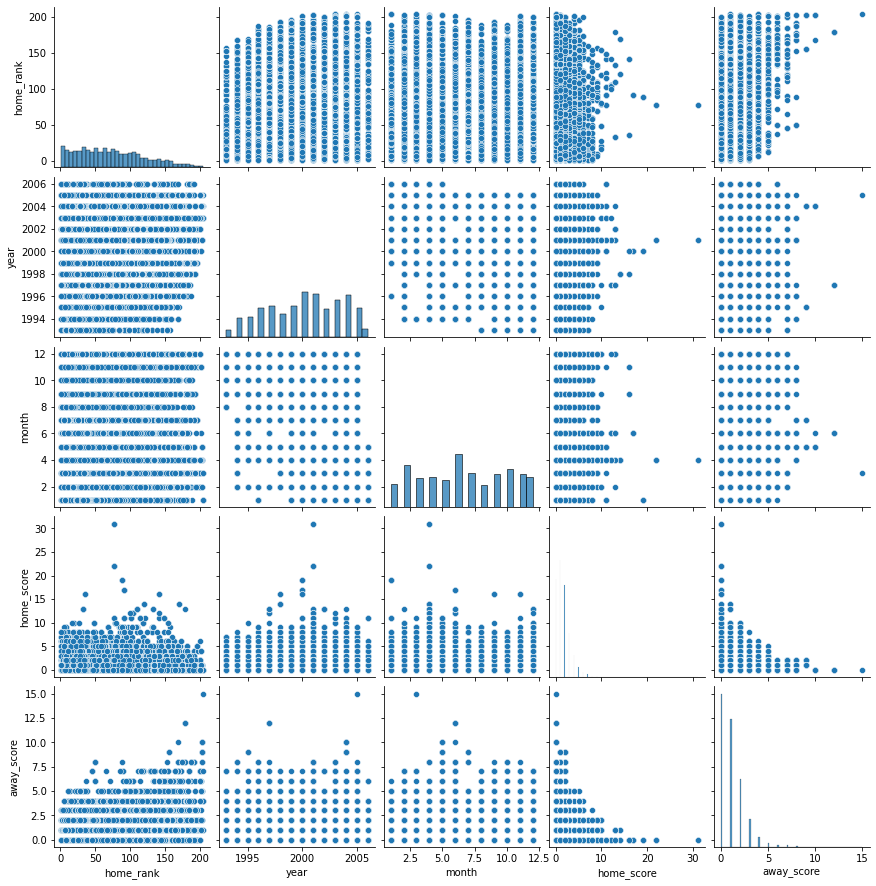

In [ ]:
# Plotting pairplots
sns.pairplot(final)
plt.show()

# Predictive Analysis